# CDC NHANES 2013-2014: Supervised Learning 

The purpose of this notebook is to explore the features of the combined dataset that contains examination, diet, demographic, and lab data. Questionnaire cluster labels were added from the previous EDA notebook and are used as the predictor variable.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# importing dataset 
df = pd.read_csv('~/Downloads/capstone/CapstoneJulyNYC/Data/Clean_Data/nhanes2013_2014_df_supervised.csv')
df

,SEQN,sex,age,race_HispOrigin,race_HispOrigin_Asian,native_country,US_Citizen,edu_level,marital_stat,SPinterview_lang,...,trigly_refridg,wbc_cnt,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab,CVD_Risk
0,73557,1,69,4,4,1,1.0,3.0,4.0,1,...,140.0,4.7,5.09,15.2,29.9,33.4,204.0,13.9,167.0,0
1,73558,1,54,3,3,1,1.0,3.0,1.0,1,...,257.0,12.6,3.84,11.9,31.0,32.5,314.0,9.1,170.0,0
2,73559,1,72,3,3,1,1.0,4.0,1.0,1,...,51.0,7.2,5.53,17.2,31.1,34.3,237.0,8.9,126.0,0
3,73560,1,9,3,3,1,1.0,9.0,99.0,1,...,111.0,7.8,4.61,12.9,28.0,34.0,240.0,5.4,168.0,1
4,73561,2,73,3,3,1,1.0,5.0,1.0,1,...,88.0,6.6,4.72,14.5,30.6,33.0,300.0,4.9,201.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,26,2,2,1,1.0,5.0,5.0,1,...,76.0,5.1,5.07,14.9,29.3,32.9,226.0,5.0,190.0,0
9809,83728,2,2,1,1,1,1.0,9.0,99.0,1,...,111.0,6.6,4.22,12.2,28.9,35.0,441.0,5.4,175.0,1
9810,83729,2,42,4,4,2,1.0,5.0,3.0,1,...,106.0,6.4,4.16,12.2,29.2,32.8,213.0,5.3,152.0,0
9811,83730,1,7,2,2,1,1.0,9.0,99.0,1,...,111.0,9.9,5.03,13.7,27.2,33.7,352.0,5.4,167.0,1


In [5]:
df.set_index('SEQN', inplace = True)
df

,sex,age,race_HispOrigin,race_HispOrigin_Asian,native_country,US_Citizen,edu_level,marital_stat,SPinterview_lang,SP_interpreter,...,trigly_refridg,wbc_cnt,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab,CVD_Risk
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,1,69,4,4,1,1.0,3.0,4.0,1,2,...,140.0,4.7,5.09,15.2,29.9,33.4,204.0,13.9,167.0,0
73558,1,54,3,3,1,1.0,3.0,1.0,1,2,...,257.0,12.6,3.84,11.9,31.0,32.5,314.0,9.1,170.0,0
73559,1,72,3,3,1,1.0,4.0,1.0,1,2,...,51.0,7.2,5.53,17.2,31.1,34.3,237.0,8.9,126.0,0
73560,1,9,3,3,1,1.0,9.0,99.0,1,2,...,111.0,7.8,4.61,12.9,28.0,34.0,240.0,5.4,168.0,1
73561,2,73,3,3,1,1.0,5.0,1.0,1,2,...,88.0,6.6,4.72,14.5,30.6,33.0,300.0,4.9,201.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83727,1,26,2,2,1,1.0,5.0,5.0,1,2,...,76.0,5.1,5.07,14.9,29.3,32.9,226.0,5.0,190.0,0
83728,2,2,1,1,1,1.0,9.0,99.0,1,2,...,111.0,6.6,4.22,12.2,28.9,35.0,441.0,5.4,175.0,1
83729,2,42,4,4,2,1.0,5.0,3.0,1,2,...,106.0,6.4,4.16,12.2,29.2,32.8,213.0,5.3,152.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 73557 to 83731
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sex                           9813 non-null   int64  
 1   age                           9813 non-null   int64  
 2   race_HispOrigin               9813 non-null   int64  
 3   race_HispOrigin_Asian         9813 non-null   int64  
 4   native_country                9813 non-null   int64  
 5   US_Citizen                    9813 non-null   float64
 6   edu_level                     9813 non-null   float64
 7   marital_stat                  9813 non-null   float64
 8   SPinterview_lang              9813 non-null   int64  
 9   SP_interpreter                9813 non-null   int64  
 10  household_size                9813 non-null   int64  
 11  family_size                   9813 non-null   int64  
 12  household_size_children       9813 non-null   int64  
 13

## Feature Engineering 

Creating a new feature of the average of the three systolic and diastolic blood pressure readings present in the dataframe

In [11]:
df['bpsy_avg'] = df[['bpsy_r1', 'bpsy_r2', 'bpsy_r3']].mean(axis=1).round(1)

In [13]:
df

,sex,age,race_HispOrigin,race_HispOrigin_Asian,native_country,US_Citizen,edu_level,marital_stat,SPinterview_lang,SP_interpreter,...,wbc_cnt,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab,CVD_Risk,bpsy_avg
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,1,69,4,4,1,1.0,3.0,4.0,1,2,...,4.7,5.09,15.2,29.9,33.4,204.0,13.9,167.0,0,112.7
73558,1,54,3,3,1,1.0,3.0,1.0,1,2,...,12.6,3.84,11.9,31.0,32.5,314.0,9.1,170.0,0,157.3
73559,1,72,3,3,1,1.0,4.0,1.0,1,2,...,7.2,5.53,17.2,31.1,34.3,237.0,8.9,126.0,0,142.0
73560,1,9,3,3,1,1.0,9.0,99.0,1,2,...,7.8,4.61,12.9,28.0,34.0,240.0,5.4,168.0,1,104.7
73561,2,73,3,3,1,1.0,5.0,1.0,1,2,...,6.6,4.72,14.5,30.6,33.0,300.0,4.9,201.0,0,137.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83727,1,26,2,2,1,1.0,5.0,5.0,1,2,...,5.1,5.07,14.9,29.3,32.9,226.0,5.0,190.0,0,112.7
83728,2,2,1,1,1,1.0,9.0,99.0,1,2,...,6.6,4.22,12.2,28.9,35.0,441.0,5.4,175.0,1,115.3
83729,2,42,4,4,2,1.0,5.0,3.0,1,2,...,6.4,4.16,12.2,29.2,32.8,213.0,5.3,152.0,0,134.7


In [15]:
df['bpdi_avg'] = df[['bpdi_r1', 'bpdi_r2', 'bpdi_r3']].mean(axis=1).round(1)

In [17]:
df

,sex,age,race_HispOrigin,race_HispOrigin_Asian,native_country,US_Citizen,edu_level,marital_stat,SPinterview_lang,SP_interpreter,...,rbc_cnt,hemoglobin,hemoglobin_mean,hemoglobin_conc,platelet_cnt,HbA1c_percent,total_chol_lab,CVD_Risk,bpsy_avg,bpdi_avg
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,1,69,4,4,1,1.0,3.0,4.0,1,2,...,5.09,15.2,29.9,33.4,204.0,13.9,167.0,0,112.7,74.0
73558,1,54,3,3,1,1.0,3.0,1.0,1,2,...,3.84,11.9,31.0,32.5,314.0,9.1,170.0,0,157.3,61.3
73559,1,72,3,3,1,1.0,4.0,1.0,1,2,...,5.53,17.2,31.1,34.3,237.0,8.9,126.0,0,142.0,82.0
73560,1,9,3,3,1,1.0,9.0,99.0,1,2,...,4.61,12.9,28.0,34.0,240.0,5.4,168.0,1,104.7,36.7
73561,2,73,3,3,1,1.0,5.0,1.0,1,2,...,4.72,14.5,30.6,33.0,300.0,4.9,201.0,0,137.3,86.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83727,1,26,2,2,1,1.0,5.0,5.0,1,2,...,5.07,14.9,29.3,32.9,226.0,5.0,190.0,0,112.7,72.7
83728,2,2,1,1,1,1.0,9.0,99.0,1,2,...,4.22,12.2,28.9,35.0,441.0,5.4,175.0,1,115.3,66.7
83729,2,42,4,4,2,1.0,5.0,3.0,1,2,...,4.16,12.2,29.2,32.8,213.0,5.3,152.0,0,134.7,81.3


In [19]:
# drop other bp reading columns
df = df.drop(columns =['bpsy_r1', 'bpsy_r2', 'bpsy_r3','bpdi_r1', 'bpdi_r2', 'bpdi_r3'])

In [21]:
# verifying
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 73557 to 83731
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sex                           9813 non-null   int64  
 1   age                           9813 non-null   int64  
 2   race_HispOrigin               9813 non-null   int64  
 3   race_HispOrigin_Asian         9813 non-null   int64  
 4   native_country                9813 non-null   int64  
 5   US_Citizen                    9813 non-null   float64
 6   edu_level                     9813 non-null   float64
 7   marital_stat                  9813 non-null   float64
 8   SPinterview_lang              9813 non-null   int64  
 9   SP_interpreter                9813 non-null   int64  
 10  household_size                9813 non-null   int64  
 11  family_size                   9813 non-null   int64  
 12  household_size_children       9813 non-null   int64  
 13

## Logistic Regression

In [24]:
# separating data into X and Y

X = df.drop(columns=['CVD_Risk'])
y = df['CVD_Risk']

In [26]:
X.shape

(9813, 70)

In [28]:
y.shape

(9813,)

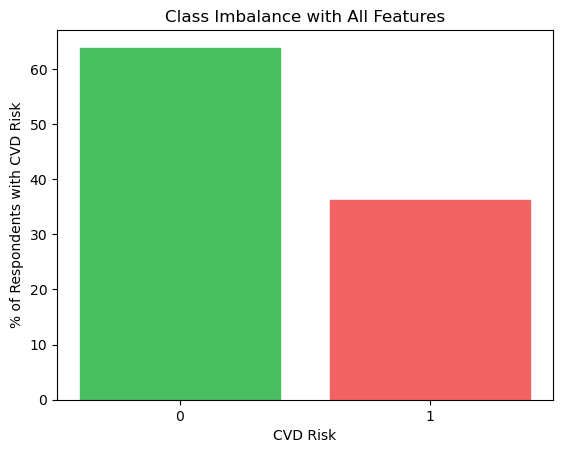

Class imbalance: [0.64 0.36]


In [30]:
# Look at distribution of reviews

values, counts = np.unique(df['CVD_Risk'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
bars = plt.bar(["0", "1"], normalized_counts*100, color='red') # plotting normalized counts
bars[0].set_color('#49BF61')
bars[1].set_color('#F36363')
plt.xlabel('CVD Risk')
plt.ylabel('% of Respondents with CVD Risk')
plt.title('Class Imbalance with All Features')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

In [32]:
# there is a class imbalance --> will consider optimizing c and using lasso,
# fitting a log reg model and checking performance

### Using Train-Test Split 

In [35]:
# creating train test split 70% train, 30% test
#straify = y for class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [37]:
#scale 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [39]:
# Instantiate model
cvd_logreg = LogisticRegression(solver='lbfgs',random_state=1, max_iter=1000)

# Fit model
cvd_logreg.fit(X_train_ss, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [41]:
# Predict on training and testing data
y_train_pred = cvd_logreg.predict(X_train_ss)
y_test_pred = cvd_logreg.predict(X_test_ss)

In [43]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9856
Test Accuracy: 0.9813


### Interpretting Coefficients

In [55]:
# extracting column names
feature_names = X_train.columns

In [57]:
feature_names

Index(['sex', 'age', 'race_HispOrigin', 'race_HispOrigin_Asian',
       'native_country', 'US_Citizen', 'edu_level', 'marital_stat',
       'SPinterview_lang', 'SP_interpreter', 'household_size', 'family_size',
       'household_size_children', 'household_size_children_6-17',
       'household_size_adult60', 'household_ref_sex', 'household_ref_age',
       'household_ref_edu_level', 'household_ref_marital_stat',
       'Full_Samp_2yr_INTRWT', 'Full_Samp_2yr_MECWT', 'Maskedvar_psuedo_psu',
       'Maskedvar_psuedo_strat', 'total_household_income',
       'total_family_income', 'fam_income_poverty_ratio', 'puls_reg_nonreg',
       'weight_kg', 'height_cm', 'bmi', 'waist_circum_cm', 'arm_circum_cm',
       'leg_len_cm', 'energy_kcal', 'protein_gm', 'carb_gm', 'tot_sugar_gm',
       'tot_fat_gm', 'tot_sat_fattyacids_gm', 'tot_monounsat_fattyacids_gm',
       'tot_polyunsat_fattyacids_gm', 'chol_mg_diet', 'fiber_gm_diet',
       'sodium_mg_diet', 'potassium_mg_diet', 'calcium_mg_diet',
    

In [59]:
#getting coefficients of features 
coefficients = cvd_logreg.coef_[0]
coefficients

array([-5.75539350e-01, -1.16871226e+01,  2.34993303e-01, -4.29393897e-03,
       -8.76434986e-01, -2.04374312e-01,  8.53561223e-01,  9.02158041e-01,
        3.29939844e-01, -1.71000180e-01, -2.23857567e-01, -2.11992008e-01,
        1.55271620e-01,  4.93180622e-01,  1.18639735e-01, -3.71424839e-02,
       -4.53695987e-01, -2.32069955e-02, -2.93414088e-01,  3.28777745e-01,
       -1.80158481e-01, -5.47800733e-02, -1.05444039e-01, -7.07107747e-02,
       -3.82312330e-02,  9.86250160e-02,  1.65479285e-01,  9.05461893e-02,
       -1.62780730e+00,  4.46415832e-01, -6.34333472e-02, -9.56063364e-01,
        3.01478440e-01,  7.07614928e-02, -5.79009627e-02,  6.02636598e-01,
       -3.73818091e-01, -2.45259613e-01,  3.04821660e-01, -1.77179206e-01,
        9.54532934e-02, -3.51107119e-02, -3.23967859e-01, -2.00161628e-01,
        2.89175186e-01, -2.76045196e-02, -1.88387233e-03, -9.83388171e-02,
       -5.52323052e-02,  7.97911862e-02, -1.91418864e-01, -6.85692692e-01,
       -3.40975144e-01,  

In [61]:
# Place feature names in a dataframe
feat_df = pd.DataFrame({'Feature': feature_names})
feat_df

,Feature
0,sex
1,age
2,race_HispOrigin
3,race_HispOrigin_Asian
4,native_country
...,...
65,platelet_cnt
66,HbA1c_percent
67,total_chol_lab
68,bpsy_avg


In [63]:
#placing coefficients in dataset
coef_df = pd.DataFrame({"Coefficients": coefficients})
coef_df

,Coefficients
0,-0.575539
1,-11.687123
2,0.234993
3,-0.004294
4,-0.876435
...,...
65,0.245968
66,0.365394
67,-0.213115
68,-0.267902


In [65]:
#merging feature names and coefficients in one dataframe
feat_coef = pd.concat([feat_df,coef_df], axis=1)
feat_coef

,Feature,Coefficients
0,sex,-0.575539
1,age,-11.687123
2,race_HispOrigin,0.234993
3,race_HispOrigin_Asian,-0.004294
4,native_country,-0.876435
...,...,...
65,platelet_cnt,0.245968
66,HbA1c_percent,0.365394
67,total_chol_lab,-0.213115
68,bpsy_avg,-0.267902


#### Positive Coefficients

In [68]:
top_feat = feat_coef.sort_values(by='Coefficients', ascending=False).set_index('Feature')
top_feat

,Coefficients
Feature,
marital_stat,0.902158
edu_level,0.853561
carb_gm,0.602637
household_size_children_6-17,0.493181
bmi,0.446416
...,...
native_country,-0.876435
arm_circum_cm,-0.956063
creatinine,-1.247366


<AxesSubplot:xlabel='Feature'>

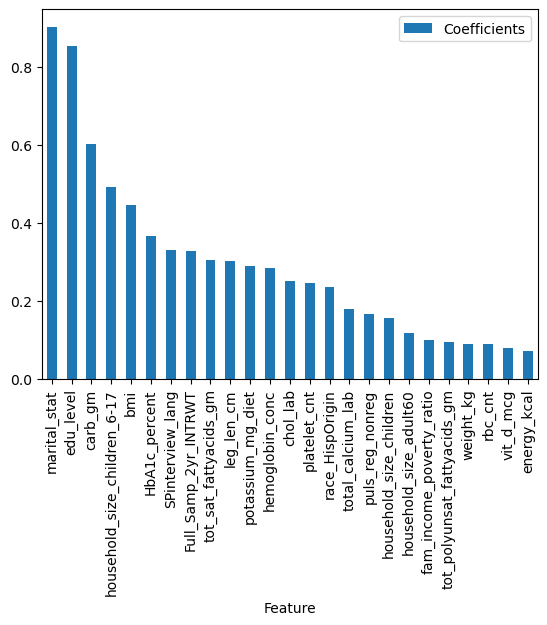

In [74]:
#plotting top positive coefficients 
top_feat.head(25).plot(kind='bar')


#### Negative Coefficients

In [76]:
bottom_feat = feat_coef.sort_values(by='Coefficients', ascending=True).set_index('Feature')
bottom_feat
bottom_feat.head(20)

,Coefficients
Feature,
age,-11.687123
height_cm,-1.627807
creatinine,-1.247366
arm_circum_cm,-0.956063
native_country,-0.876435
alcohol_gm,-0.685693
sex,-0.575539
household_ref_age,-0.453696
tot_sugar_gm,-0.373818


<AxesSubplot:xlabel='Feature'>

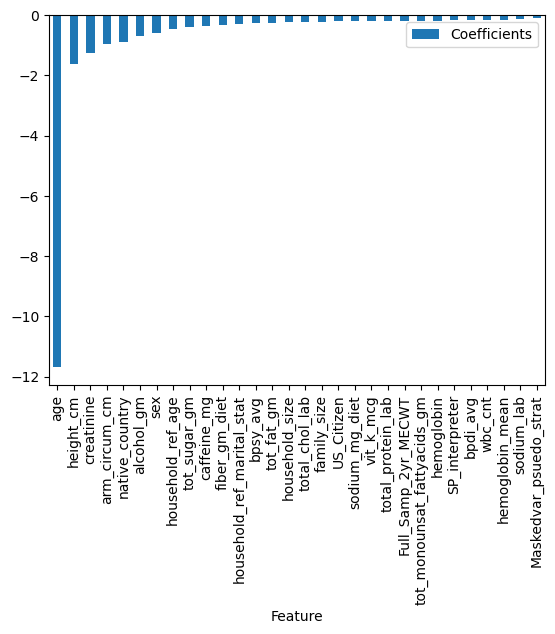

In [80]:
#plotting negative coefficients
bottom_feat.head(30).plot(kind='bar')

### Implementing Logistic Regression With Only Demographic Features

Focusing on demographic data to create a more simplier model for practicality 

In [104]:
demographic_df = df[['sex', 'age', 'race_HispOrigin',
       'native_country', 'US_Citizen', 'edu_level', 'marital_stat',
       'household_size', 'family_size','household_size_children', 
       'household_size_children_6-17',
       'household_size_adult60', 'household_ref_sex', 'household_ref_age',
       'household_ref_edu_level', 'household_ref_marital_stat',
       'total_household_income','total_family_income', 
       'fam_income_poverty_ratio','weight_kg','height_cm','CVD_Risk'
       ]]

In [106]:
# separating data into X and Y

X_lr2 = demographic_df.drop(columns='CVD_Risk')
y_lr2 = demographic_df['CVD_Risk']

In [108]:
X_lr2.columns

Index(['sex', 'age', 'race_HispOrigin', 'native_country', 'US_Citizen',
       'edu_level', 'marital_stat', 'household_size', 'family_size',
       'household_size_children', 'household_size_children_6-17',
       'household_size_adult60', 'household_ref_sex', 'household_ref_age',
       'household_ref_edu_level', 'household_ref_marital_stat',
       'total_household_income', 'total_family_income',
       'fam_income_poverty_ratio', 'weight_kg', 'height_cm'],
      dtype='object')

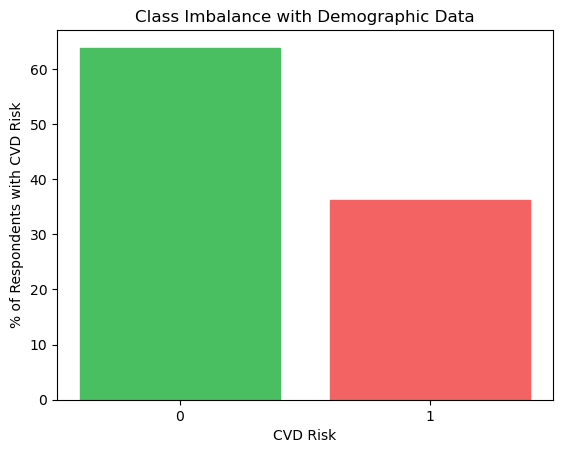

Class imbalance: [0.64 0.36]


In [110]:
# Checking distribution of CVD Risk

values, counts = np.unique(demographic_df['CVD_Risk'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
bars = plt.bar(["0", "1"], normalized_counts*100, color='red') # plotting normalized counts
bars[0].set_color('#49BF61')
bars[1].set_color('#F36363')
plt.xlabel('CVD Risk')
plt.ylabel('% of Respondents with CVD Risk')
plt.title('Class Imbalance with Demographic Data')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

Class imbalance is still the same 

In [113]:
# creating train test split 70% train, 30% test
#straify = y for class imbalance
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_lr2, y_lr2, test_size = 0.3, stratify=y, random_state=42)

In [115]:
ss.fit(X_train2)

X_train2_ss = ss.transform(X_train2)
X_test2_ss = ss.transform(X_test2)

In [117]:
# Instantiate model
cvd_logreg2 = LogisticRegression(solver='lbfgs',random_state=1, max_iter=1000)

# Fit model
cvd_logreg2.fit(X_train2_ss, y_train2)

LogisticRegression(max_iter=1000, random_state=1)

In [119]:
# Predict on training and testing data
y_train2_pred = cvd_logreg2.predict(X_train2_ss)
y_test2_pred = cvd_logreg2.predict(X_test2_ss)

In [121]:
# Calculate accuracy
train_accuracy2 = accuracy_score(y_train2, y_train2_pred)
test_accuracy2 = accuracy_score(y_test2, y_test2_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9856
Test Accuracy: 0.9813


Same as baseline

In [124]:
feature_names2 = X_train2.columns

In [126]:
coefficients2 = cvd_logreg2.coef_[0]
coefficients2

array([-3.65116207e-01, -1.32676735e+01,  8.22874933e-02, -8.55376029e-01,
        1.01623562e-02,  8.04541539e-01,  8.45021893e-01, -4.19695016e-01,
       -3.68458786e-02,  1.76091836e-01,  5.38563381e-01,  7.08202350e-02,
       -2.47939671e-02, -3.22455472e-01, -5.66000944e-02, -2.41101405e-01,
       -6.51620055e-02,  2.42720306e-02,  1.07380361e-01, -3.56551753e-01,
       -1.31833166e+00])

In [128]:
# Place feature names in a dataframe
feat_df2 = pd.DataFrame({'Feature': feature_names2})

#place coefficients in dataframe
coef_df2 = pd.DataFrame({"Coefficients": coefficients2})

#concatenate dataframes
feat_coef2 = pd.concat([feat_df2,coef_df2], axis=1)
feat_coef2

,Feature,Coefficients
0,sex,-0.365116
1,age,-13.267673
2,race_HispOrigin,0.082287
3,native_country,-0.855376
4,US_Citizen,0.010162
5,edu_level,0.804542
6,marital_stat,0.845022
7,household_size,-0.419695
8,family_size,-0.036846
9,household_size_children,0.176092


In [130]:
top_feat2 = feat_coef2.sort_values(by='Coefficients', ascending=False).set_index('Feature')
top_feat2

,Coefficients
Feature,
marital_stat,0.845022
edu_level,0.804542
household_size_children_6-17,0.538563
household_size_children,0.176092
fam_income_poverty_ratio,0.107380
race_HispOrigin,0.082287
household_size_adult60,0.070820
total_family_income,0.024272
US_Citizen,0.010162


<AxesSubplot:xlabel='Feature'>

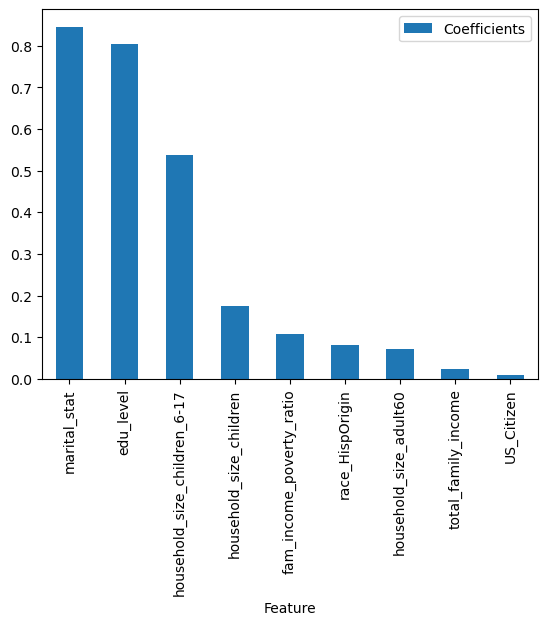

In [132]:
#plotting 
top_feat2.head(9).plot(kind='bar')

Marital_stat and edu_level have the highest positive coefficients, indicating a strong positive correlation of CVD Risk.

In [134]:
bottom_feat2 = feat_coef2.sort_values(by='Coefficients', ascending=True).set_index('Feature')
bottom_feat2

,Coefficients
Feature,
age,-13.267673
height_cm,-1.318332
native_country,-0.855376
household_size,-0.419695
sex,-0.365116
weight_kg,-0.356552
household_ref_age,-0.322455
household_ref_marital_stat,-0.241101
total_household_income,-0.065162


<AxesSubplot:xlabel='Feature'>

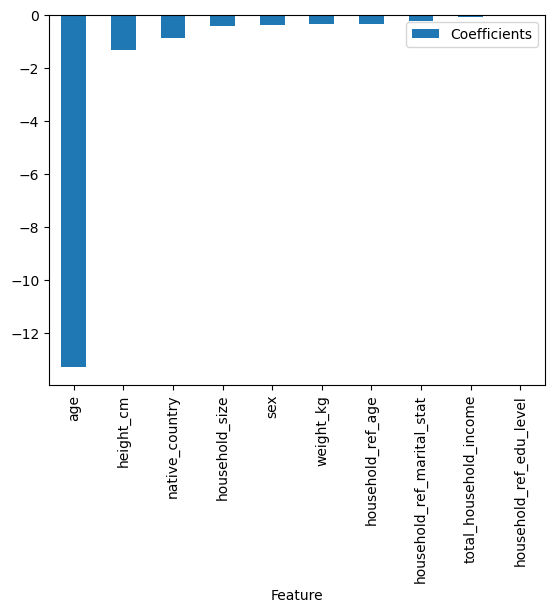

In [136]:
#plotting 
bottom_feat2.head(10).plot(kind='bar')

Age has the highest negative coefficient out of all features, showing a strong negative correlation with CVD Risk.

#### Addressing High VIF Values

Features that have high VIF values have multicollinearity.
The approach used was to get rid of certain features that held the similar information, such those that started witg "household_ref", then continuing to iterate through the VIF values for each feature and checking their correlation each time a feature was removed. Lasso was used prior to fitting the new logisitic regression model to reduce certain features to 0. 

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# excluding 'CVD_Risk' to check VIF for other features
X = demographic_df.drop(columns=['CVD_Risk'])
for i,col in enumerate(X.columns):
    print("VIF for col {:30s} = {:2.5f}".format(col,VIF(X,i)))


VIF for col sex                            = 9.94899
VIF for col age                            = 20.11946
VIF for col race_HispOrigin                = 7.42480
VIF for col native_country                 = 2.26260
VIF for col US_Citizen                     = 13.19737
VIF for col edu_level                      = 64.94498
VIF for col marital_stat                   = 30.78792
VIF for col household_size                 = 58.26679
VIF for col family_size                    = 50.71335
VIF for col household_size_children        = 3.05695
VIF for col household_size_children_6-17   = 4.94734
VIF for col household_size_adult60         = 3.01598
VIF for col household_ref_sex              = 10.27785
VIF for col household_ref_age              = 28.41157
VIF for col household_ref_edu_level        = 9.80283
VIF for col household_ref_marital_stat     = 1.25933
VIF for col total_household_income         = 11.26489
VIF for col total_family_income            = 11.23932
VIF for col fam_income_poverty_ratio

<AxesSubplot:>

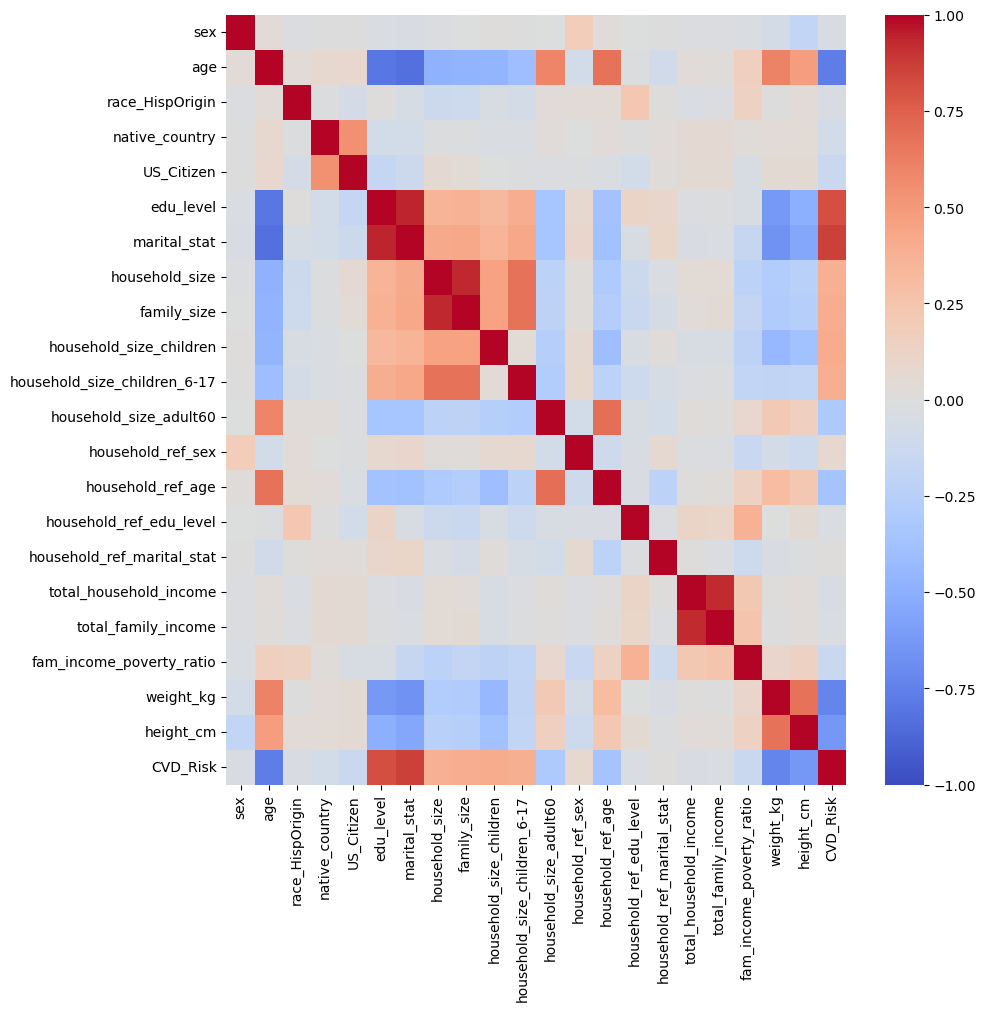

In [146]:
# correlation heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(demographic_df.corr(),
            cmap='coolwarm',
            vmin=-1.0,
            vmax=1.0,
            ax=fig.gca()) # use the axes from the current figure created above (bigger)

In [148]:
#removing household reference info 
demographic_df = demographic_df.drop(columns=['household_ref_sex', 'household_ref_age',
       'household_ref_edu_level', 'household_ref_marital_stat'])

<AxesSubplot:>

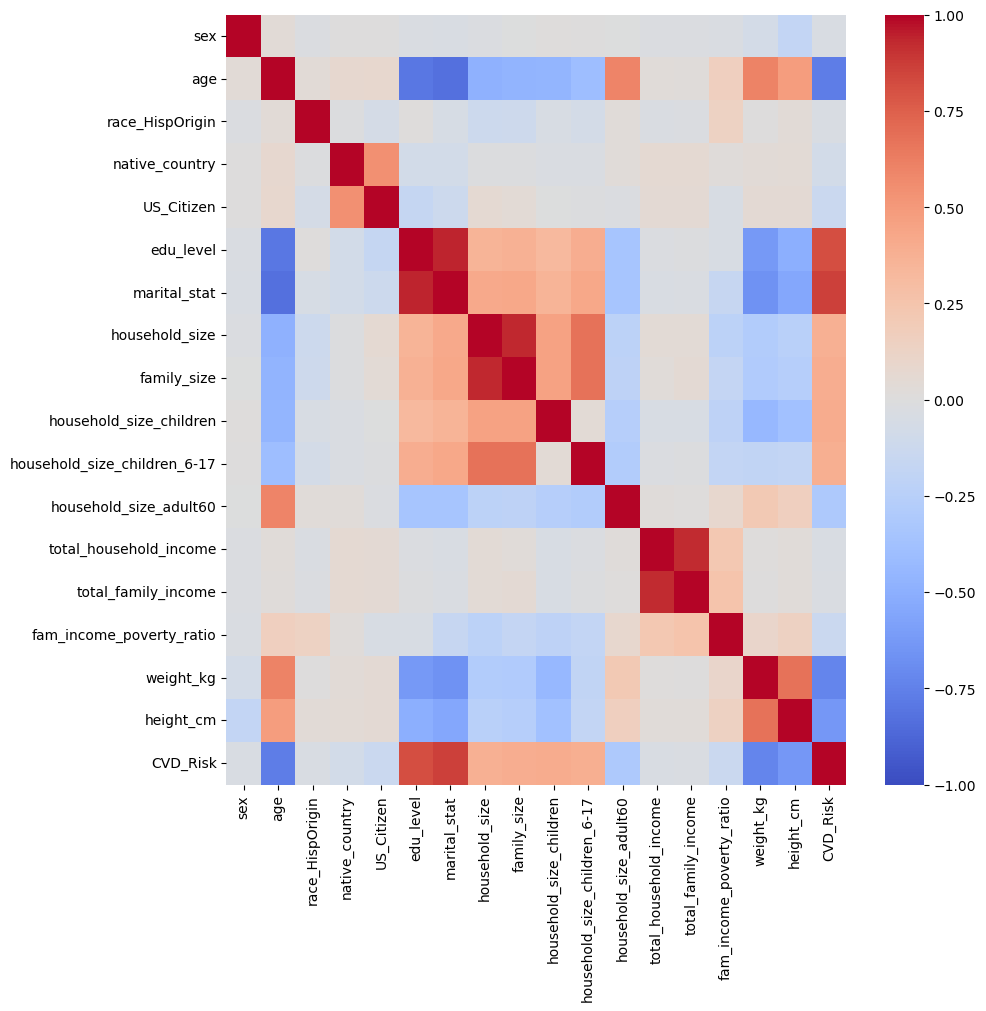

In [150]:
# correlation heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(demographic_df.corr(),
            cmap='coolwarm',
            vmin=-1.0,
            vmax=1.0,
            ax=fig.gca()) # use the axes from the current figure created above (bigger)

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

for i,col in enumerate(demographic_df.columns):
    print("VIF for col {:30s} = {:2.5f}".format(col,VIF(demographic_df,i)))

VIF for col sex                            = 9.12515
VIF for col age                            = 14.13821
VIF for col race_HispOrigin                = 7.14128
VIF for col native_country                 = 2.26225
VIF for col US_Citizen                     = 13.18555
VIF for col edu_level                      = 55.05035
VIF for col marital_stat                   = 28.93930
VIF for col household_size                 = 57.42629
VIF for col family_size                    = 49.58297
VIF for col household_size_children        = 3.06794
VIF for col household_size_children_6-17   = 4.94753
VIF for col household_size_adult60         = 2.61375
VIF for col total_household_income         = 11.20399
VIF for col total_family_income            = 11.20616
VIF for col fam_income_poverty_ratio       = 3.90293
VIF for col weight_kg                      = 13.19642
VIF for col height_cm                      = 53.95442
VIF for col CVD_Risk                       = 7.43506


In [154]:
#removing multiple household size features
demographic_df = demographic_df.drop(columns=['household_size_children_6-17','household_size_children','household_size_adult60'])

In [156]:
for i,col in enumerate(demographic_df.columns):
    print("VIF for col {:30s} = {:2.5f}".format(col,VIF(demographic_df,i)))

VIF for col sex                            = 9.03895
VIF for col age                            = 8.56701
VIF for col race_HispOrigin                = 7.13052
VIF for col native_country                 = 2.25759
VIF for col US_Citizen                     = 12.94123
VIF for col edu_level                      = 54.45726
VIF for col marital_stat                   = 27.63306
VIF for col household_size                 = 53.63075
VIF for col family_size                    = 47.33964
VIF for col total_household_income         = 11.19877
VIF for col total_family_income            = 11.20410
VIF for col fam_income_poverty_ratio       = 3.77477
VIF for col weight_kg                      = 12.53563
VIF for col height_cm                      = 51.65639
VIF for col CVD_Risk                       = 7.20394


In [158]:
#removing multiple household size features
demographic_df = demographic_df.drop(columns=['total_family_income'])

In [160]:
for i,col in enumerate(demographic_df.columns):
    print("VIF for col {:30s} = {:2.5f}".format(col,VIF(demographic_df,i)))

VIF for col sex                            = 9.03760
VIF for col age                            = 8.55996
VIF for col race_HispOrigin                = 7.12985
VIF for col native_country                 = 2.25759
VIF for col US_Citizen                     = 12.93232
VIF for col edu_level                      = 54.45672
VIF for col marital_stat                   = 27.62670
VIF for col household_size                 = 51.90338
VIF for col family_size                    = 45.44734
VIF for col total_household_income         = 1.62325
VIF for col fam_income_poverty_ratio       = 3.73034
VIF for col weight_kg                      = 12.53554
VIF for col height_cm                      = 51.65571
VIF for col CVD_Risk                       = 7.20394


#### Applying Regularization

In [162]:
# separating data into X and Y

X_lr_l1 = demographic_df.drop(columns='CVD_Risk')
y_lr_l1 = demographic_df['CVD_Risk']

In [164]:
# creating train test split 70% train, 30% test
#straify = y for class imbalance
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(X_lr_l1, y_lr_l1, test_size = 0.3, stratify=y, random_state=42)

In [166]:
ss = StandardScaler()
ss.fit(X_train)

X_train_l1_ss = ss.transform(X_train)
X_test_l1_ss = ss.transform(X_test)

In [168]:
# Define the logistic regression model with L1 regularization (lasso)
cvd_logreg_l1 = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=1000)

# Set up the parameter grid to tune the C value (regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(cvd_logreg_l1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_l1_ss, y_train_l1)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          random_state=42, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [169]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

In [172]:
# Evaluate on the test set
test_acc = best_model.score(X_test_l1_ss, y_test_l1)
print(f"Test accuracy with Lasso: {test_acc:.4f}")

Test accuracy with Lasso: 0.9817


## Using ML Pipeline for Hyperparameter Tuning 

In [174]:
# Define the pipeline structure with standard scaler and logistic regression as placeholders
estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression(max_iter=1000))]  # Use Logistic Regression as placeholder
pipe = Pipeline(estimators)

In [178]:
# Define the parameter grid for hyperparameter tuning (include different penalties, solvers, and C values)
param_grid = [
    {
        'model': [LogisticRegression(max_iter=1000)],  # Ensure max_iter is high to avoid convergence issues
        'normalise': [StandardScaler(), None],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['saga', 'liblinear'],  # 'saga' works with both l1 and l2 penalties
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Tuning for regularization strength
    }
]
grid = GridSearchCV(pipe, param_grid, cv=5) #cross validation with 5 partitions 
fittedgrid = grid.fit(X_train, y_train)

C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\isouf\anaconda3\envs\ml_env\lib\site-pack

In [180]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', None),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [182]:
# Best hyperparameters
fittedgrid.best_params_

{'model': LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear'),
 'model__C': 0.1,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'normalise': None}

In [186]:
fittedgrid.score(X_test,y_test)

1.0

#### Trying New Model with Best Hyperparameters

In [188]:
X = demographic_df.drop(columns="CVD_Risk")
y = demographic_df["CVD_Risk"]

In [190]:
# creating train test split 70% train, 30% test
#straify = y for class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [192]:
ss = StandardScaler()
ss.fit(X_train)

X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [194]:
cvd_logreg_best = LogisticRegression(solver='liblinear',random_state=1, max_iter=1000, penalty = 'l1', C=0.01)

In [196]:
# Fit model
cvd_logreg_best.fit(X_train_ss, y_train)

LogisticRegression(C=0.01, max_iter=1000, penalty='l1', random_state=1,
                   solver='liblinear')

In [198]:
# Predict on training and testing data
y_train_pred = cvd_logreg_best.predict(X_train_ss)
y_test_pred = cvd_logreg_best.predict(X_test_ss)

In [200]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9490
Test Accuracy: 0.9450


Lower than accuracies for baseline model:

Train Accuracy: 0.9856
Test Accuracy: 0.9813

## Model Evaluation 

In [204]:
# Get class predictions
y_pred = cvd_logreg_best.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted CVD Risk", "Predicted Non CVD Risk"], 
    index=["True CVD Risk", "Non CVD Risk"]
)

display(cf_df)

,Predicted CVD Risk,Predicted Non CVD Risk
True CVD Risk,1757,123
Non CVD Risk,39,1025


The best model was able to perform well in terms of predicting CVD Risk, it got a few cases incorrectly.

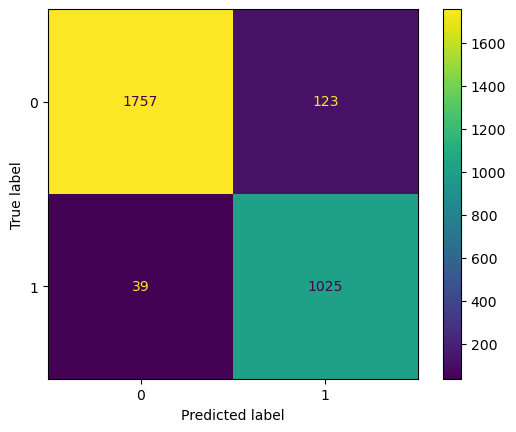

In [206]:
# always include this in classification model ****
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(cvd_logreg_best, X_test_ss, y_test);

In [208]:
# Precision
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred)

0.8928571428571429

The model was able to predicted 89% of cases as positive for CVD Risk, in which were actually positive 

In [210]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred)

0.9633458646616542

The model was able to correctly identify 96% of actual positive cases. 

In [212]:
y_proba = cvd_logreg_best.predict_proba(X_test_ss)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

TPR = recall_score(y_test, y_binary)
print(f"TPR: {TPR}")

TPR: 0.9633458646616542


In [214]:
def false_positive_rate(y_true, y_pred):

    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)

    return FPR

In [216]:
y_proba = cvd_logreg_best.predict_proba(X_test_ss)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

FPR = false_positive_rate(y_test, y_binary)
print(f"FPR: {FPR}")

FPR: 0.06542553191489361


### ROC Plot

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score

#Get the probability for each point in the test set.
classifier = LogisticRegression()
y_proba = classifier.fit(X_train_ss, y_train).predict_proba(X_test_ss)[:,1]
thresholds = np.linspace(0, 1, 100)


# Iterate over the thresholds and compute the positive and negative recall
true_positive_rates = []
false_positive_rates = []

thresholds = np.linspace(0, 1, 50)
for threshold in thresholds:

    # Apply the cutoff and calculate the positive and negative recall
    y_pred = np.where(y_proba > threshold, 1, 0)

    tpr = recall_score(y_test, y_pred)
    fpr = false_positive_rate(y_test, y_pred)

    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)

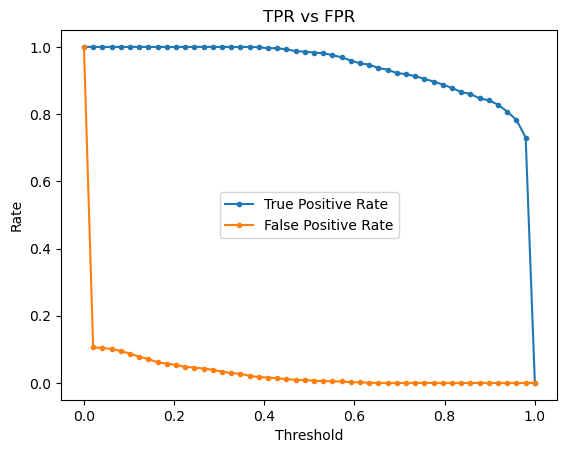

In [220]:
plt.figure()
plt.plot(thresholds, true_positive_rates, label='True Positive Rate', marker='.')
plt.plot(thresholds, false_positive_rates, label='False Positive Rate', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title("TPR vs FPR")
plt.legend()
plt.show()

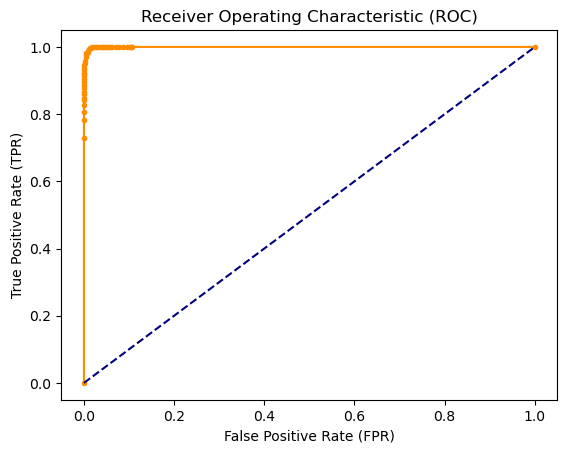

In [222]:
# True positive rate (TPR) = recall
tprs = np.array(true_positive_rates)

# False positive rate (FPR)
fprs = np.array(false_positive_rates)

plt.figure()
plt.plot(fprs, tprs, color='darkorange', marker='.')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

#the closer you are to the dotted line, the worse the model is 

The Model performed well with a high True Positive Rate and a low False Positive Rate. 